In this notebook, I want to predict the onset of diabetes based on diagnostic measures by developing a **Logistic Regression Classification** model. 

In [1]:
%run "functions.ipynb"

**Pima Indians Diabetes Database**
- Data Source: Kaggle (https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [2]:
filename = 'diabetes.csv'
dataframe = pd.read_csv(filename)
print('This dataframe has {} rows and {} columns'.format(dataframe.shape[0], dataframe.shape[1]))

This dataframe has 768 rows and 9 columns


In [3]:
dataframe.info()
dataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataframe.rename(columns={'DiabetesPedigreeFunction':'PedigreeFun'}, inplace=True)

Sanity check for missing values

In [5]:
dataframe.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
PedigreeFun      0
Age              0
Outcome          0
dtype: int64

************
Summary statistics for numerical variables

In [6]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFun,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


According to the above table, the minimum value of "Glucose","BloodPressure","SkinThickness","Insulin", and "BMI" columns is 0 which does not make sense. The 0 values will be replaced with NaN (e.g. missing values) and then will be filled with an appropriate value.

In [7]:
len(dataframe[dataframe['Insulin']==0])

374

In [8]:
selected_columns = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

def replace_min(x):
    if x == 0:
        x = np.nan
    return x

for column in selected_columns:
    dataframe[column] = dataframe[column].apply(lambda x: replace_min(x))
    
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFun,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
dataframe.isnull().sum()

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
PedigreeFun        0
Age                0
Outcome            0
dtype: int64

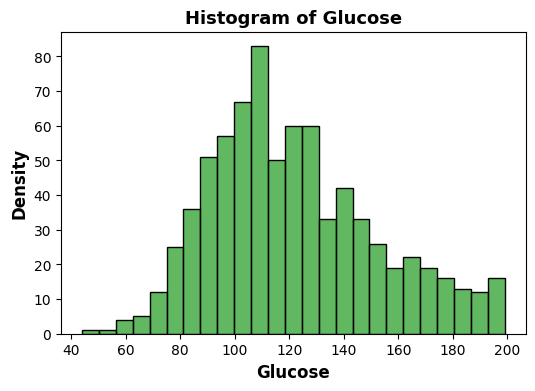

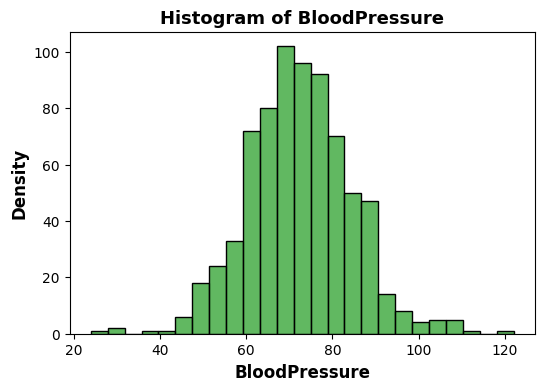

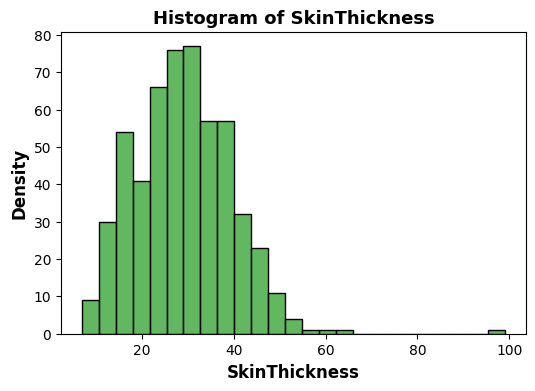

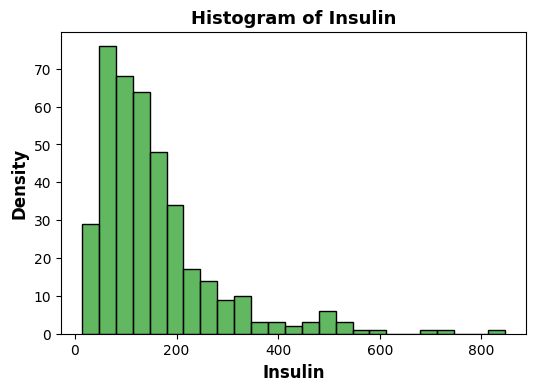

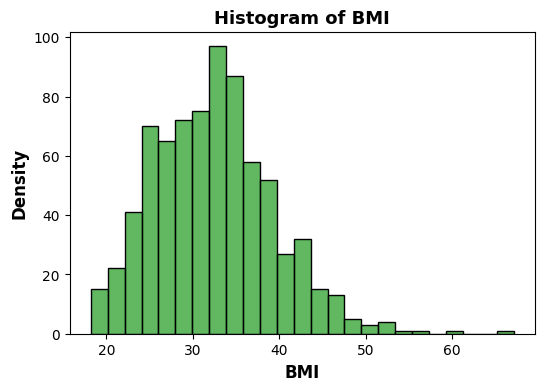

In [10]:
for column in selected_columns:
    plot_distribution(column)

In [11]:
norm_features = ['Glucose', 'BloodPressure', 'BMI']
skewed_features = ['SkinThickness', 'Insulin']

In [12]:
df = replace_missing(dataframe, norm_features, 'mean')
df = replace_missing(df, skewed_features, 'median')
df.isnull().sum()

Pregnancies      0
PedigreeFun      0
Age              0
Outcome          0
Glucose          0
BloodPressure    0
BMI              0
SkinThickness    0
Insulin          0
dtype: int64

****************
Separating dependent (y: target variable) and independent variables (X)

In [13]:
X,y = Set_X_y(df, 'Outcome')

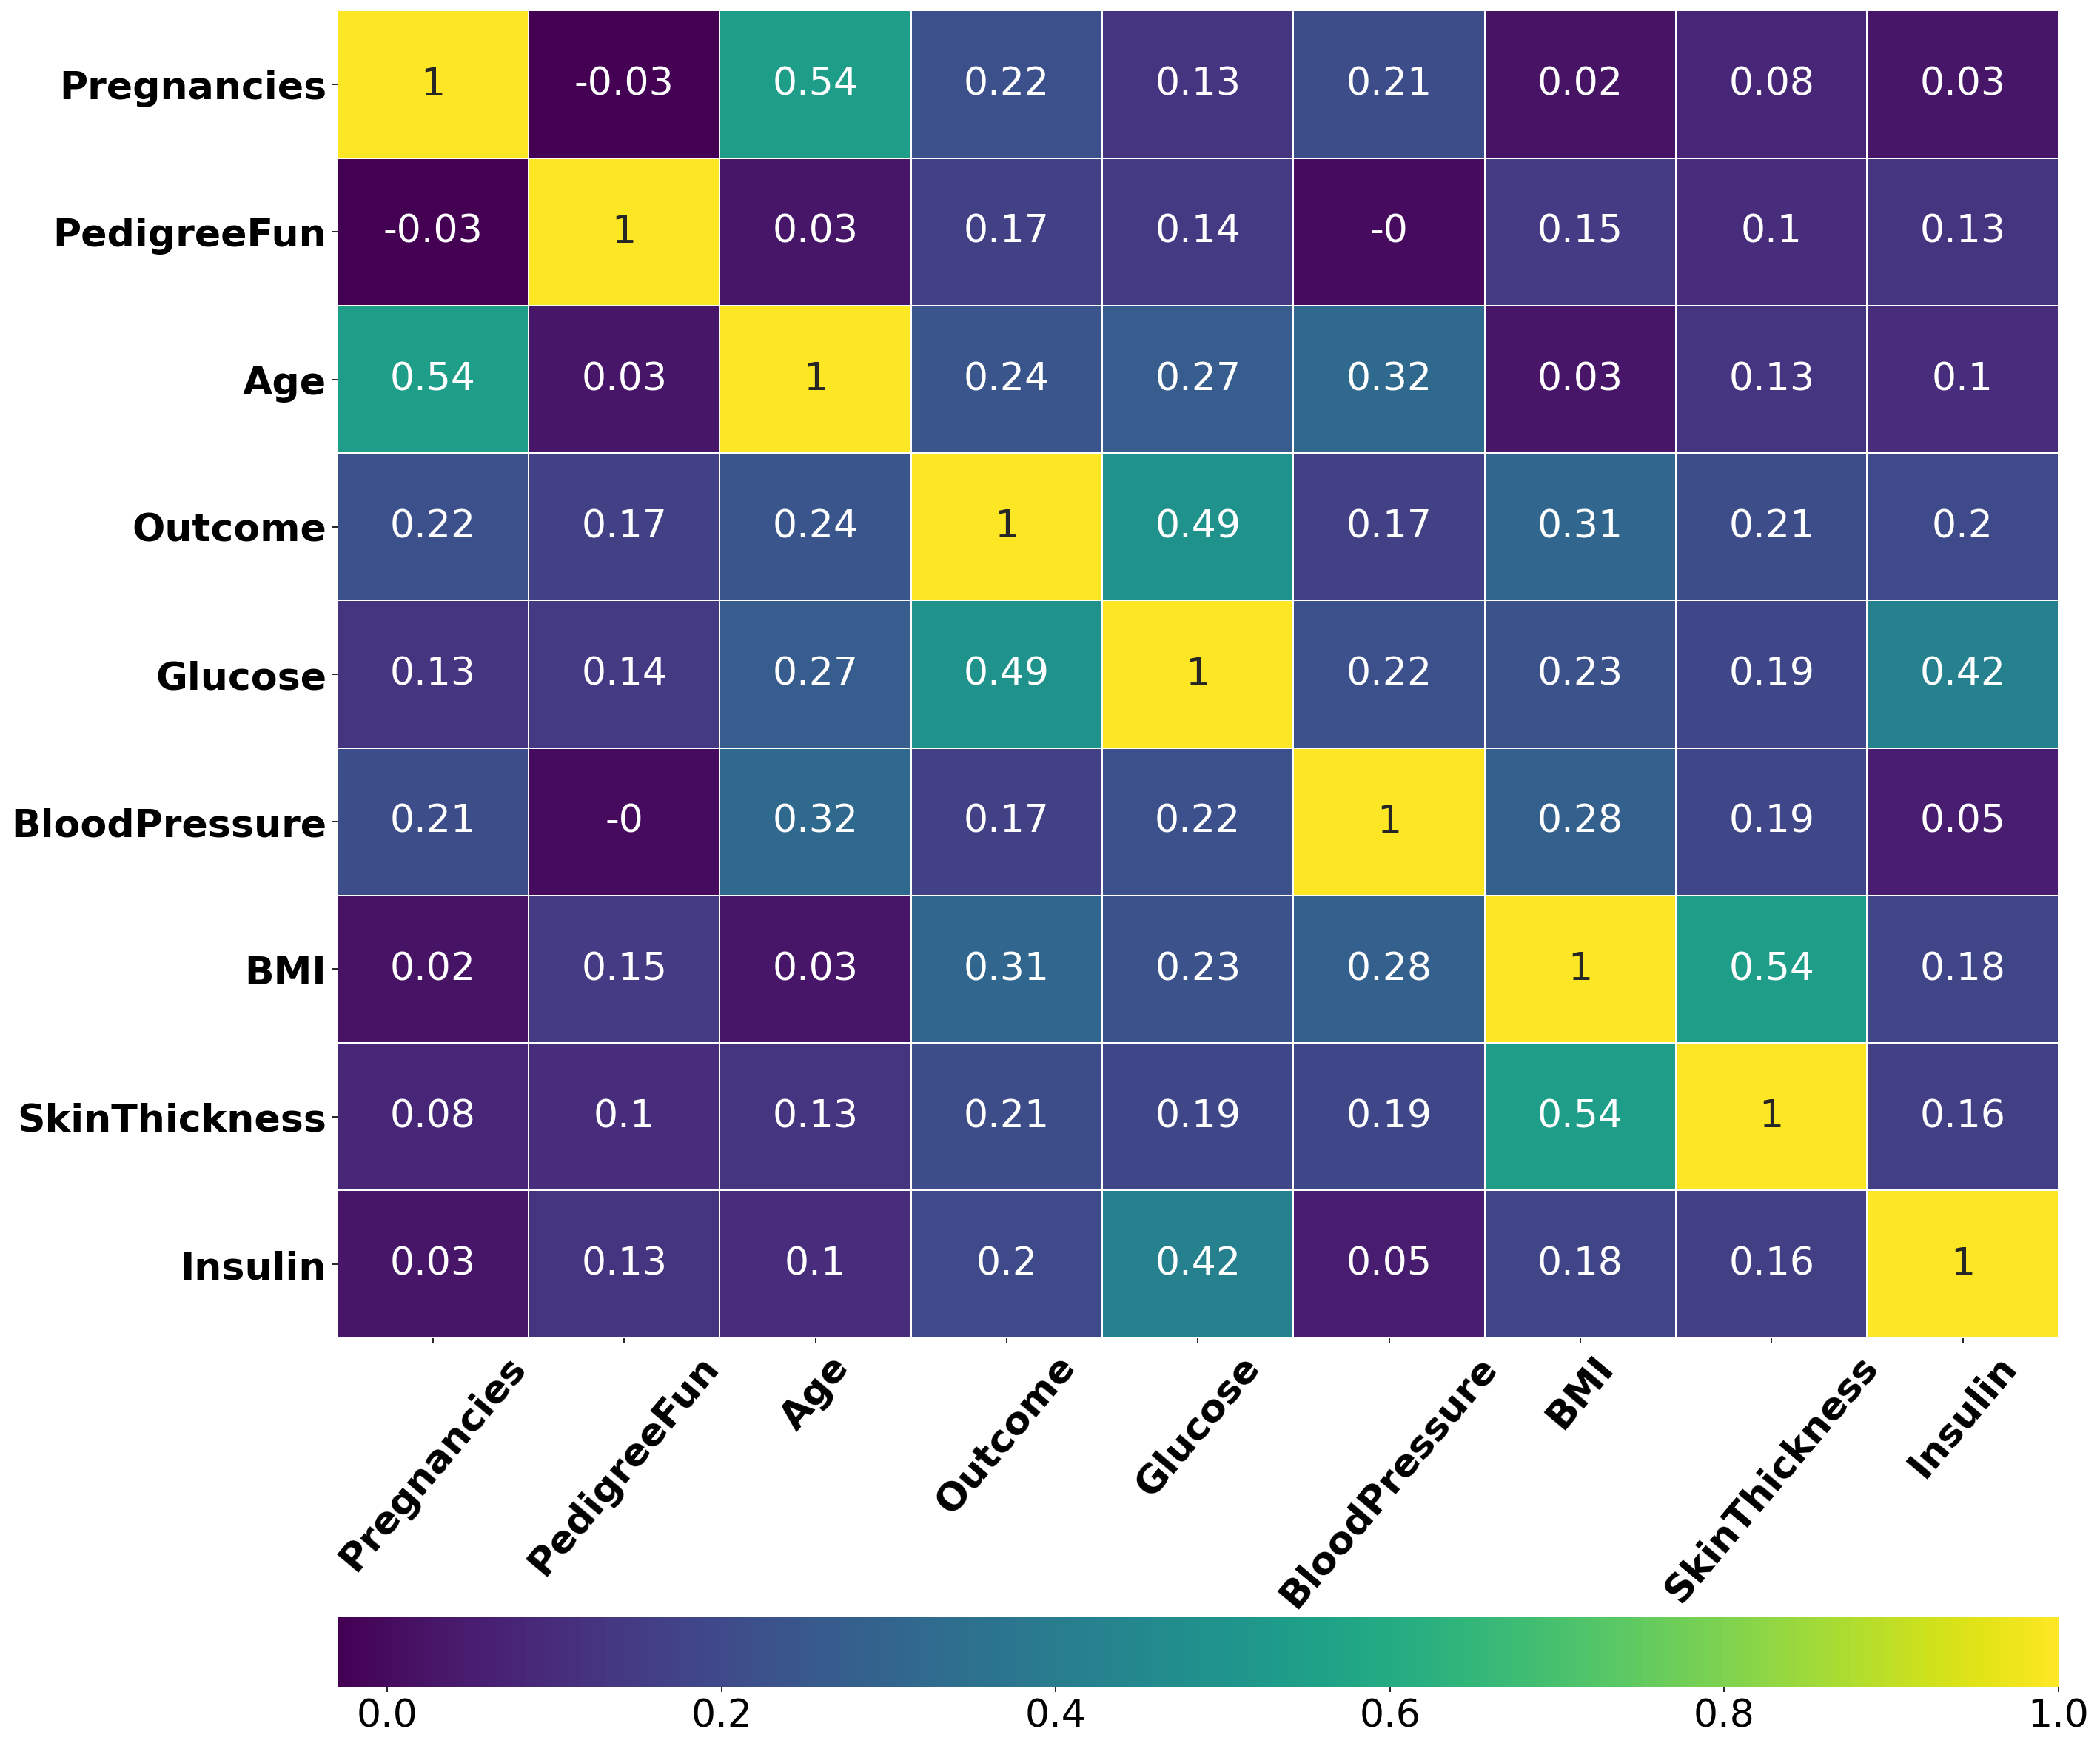

In [14]:
plot_heat_map(df)

According to the heatmap plot, there is no collinearity among the features.
***
Preparing training and test data sets: 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

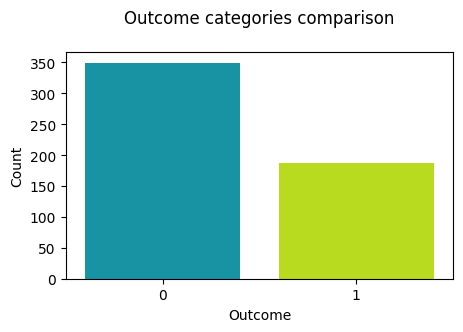

In [16]:
plt.figure(figsize = (5, 3), dpi=100)
sns.countplot(x = y_train, alpha = 1, palette="nipy_spectral")
plt.xlabel('Outcome', size = 10)
plt.ylabel('Count', size = 10)
plt.title('Outcome categories comparison\n');

In [17]:
print('1:0 ratio is {}'.format(round(y_train.value_counts()[1]/y_train.value_counts()[0],2)))

1:0 ratio is 0.54


According to the above ratio, the training dataset is slightly imbalance and does **not** raise a concern.
**Slight Imbalance** is an imbalanced classification problem where the distribution of examples is uneven by a small amount in the training dataset (e.g. 4:6 or 0.67).
(Source: https://machinelearningmastery.com/what-is-imbalanced-classification/)
***

Performing K-Fold cross-validation to estimate the accuracy

In [18]:
kfold = KFold(n_splits=3)

model = LogisticRegression(max_iter=300, C=0.01, random_state=42)
results = cross_val_score(model, X_train, y_train, cv=kfold)

print("{} accuracy with {} standard deviation".format(round(results.mean(),2), round(results.std(),2)))

0.78 accuracy with 0.02 standard deviation


In [19]:
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
train_score = metrics.accuracy_score(y_train, train_pred)
test_score = metrics.accuracy_score(y_test, test_pred) 

print("Train set accuracy: {}, Test set accuracy: {}".format(round(train_score,2), round(test_score,2)))

Train set accuracy: 0.79, Test set accuracy: 0.73


#### Model Performance on the Training Set

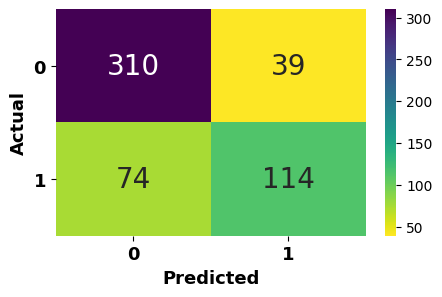

In [20]:
plot_confusion_matrix(y_train, train_pred)

In [21]:
classification_metrics(y_train, train_pred)

,Accuracy,Recall,Precision,F-score
0,0.7896,0.6064,0.7451,0.6686


#### Model Performance on the Test Set

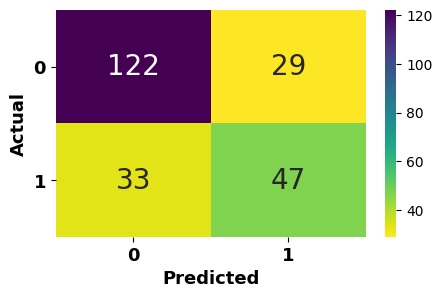

In [22]:
plot_confusion_matrix(y_test, test_pred)

In [23]:
classification_metrics(y_test, test_pred)

,Accuracy,Recall,Precision,F-score
0,0.7316,0.5875,0.6184,0.6026


The above results were obtained by considering the default threshold (0.5). In the following, I want to see if changing the threshold can improve the model performance. 
- An important note about choosing the right metric to evaluate the model perfromance: It is safer to mistakenly diagnose patients with diabetes (while they are not a true patient) rather than not diagnosing a true patient and then not treating them. In this regard, maximizing **recall** helps in minimizing false negatives and the true patients who were missed out. Thus, in the following, I will focus on maximizing the recall. 

#### Finding the optimal threshold 
- ROC-AUC curve

In [24]:
train_pred_proba = model.predict_proba(X_train)[:,1] # probabilities of the positive outcome 

fpr, tpr, thresholds = metrics.roc_curve(y_train,  train_pred_proba)
auc = metrics.roc_auc_score(y_train, train_pred_proba)

print('Area Under the Curve (AUC): {}'.format(round(auc,2)))

Area Under the Curve (AUC): 0.86


In [25]:
J = tpr - fpr # Youden’s J statistic
ix = np.argmax(J) 
best_thresh = thresholds[ix]
print('Best threshold: {}'.format(round(best_thresh,4)))

Best threshold: 0.2566


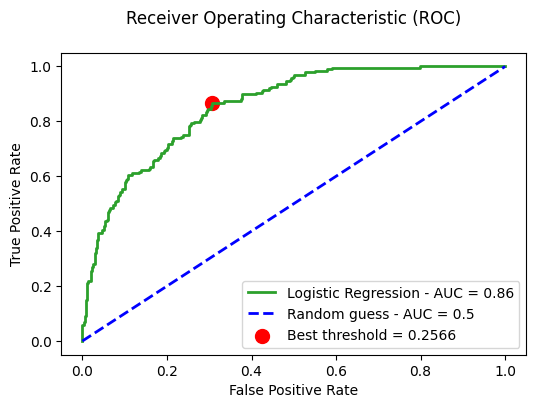

In [26]:
plt.figure(figsize=(6,4), dpi=100)
plt.plot(fpr, tpr, 'tab:green', lw=2, label='Logistic Regression - AUC = %0.2f' % auc) 
plt.plot([0, 1], [0, 1],'b--', lw=2, label='Random guess - AUC = 0.5') # Random guess ~ No prediction
plt.scatter(fpr[ix], tpr[ix], marker='o', color='red', s=100, label='Best threshold = %0.4f' % best_thresh)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)\n')
plt.legend(loc='best')
plt.show()

In [27]:
train_pred_1 = model.predict_proba(X_train)[:,1] > best_thresh
test_pred_1 = model.predict_proba(X_test)[:,1] > best_thresh

In [28]:
classification_metrics(y_train, train_pred_1)

,Accuracy,Recall,Precision,F-score
0,0.7523,0.8617,0.6022,0.709


In [29]:
classification_metrics(y_test, test_pred_1)

,Accuracy,Recall,Precision,F-score
0,0.6753,0.7875,0.5207,0.6269


- F-score (I learned the idea from this article: https://towardsdatascience.com/optimal-threshold-for-imbalanced-classification-5884e870c293)

In [30]:
thresholds = np.arange(0.0, 1.0, 0.0001)
f1score = np.zeros(shape=(len(thresholds)))

for index, item in enumerate(thresholds):
    y_pred_proba = (train_pred_proba > item)    
    f1score[index] = metrics.f1_score(y_train, y_pred_proba)    

idx = np.argmax(f1score)
best_thresh_1 = thresholds[idx]
max_f1score = round(f1score[idx],4)

print('Best threshold: {} with F-score: {}'.format(best_thresh_1, max_f1score))

Best threshold: 0.2556 with F-score: 0.7118


In [31]:
train_pred_2 = model.predict_proba(X_train)[:,1] > best_thresh_1
test_pred_2 = model.predict_proba(X_test)[:,1] > best_thresh_1

In [32]:
classification_metrics(y_train, train_pred_2)

,Accuracy,Recall,Precision,F-score
0,0.7542,0.867,0.6037,0.7118


In [33]:
classification_metrics(y_test, test_pred_2)

,Accuracy,Recall,Precision,F-score
0,0.671,0.7875,0.5164,0.6238


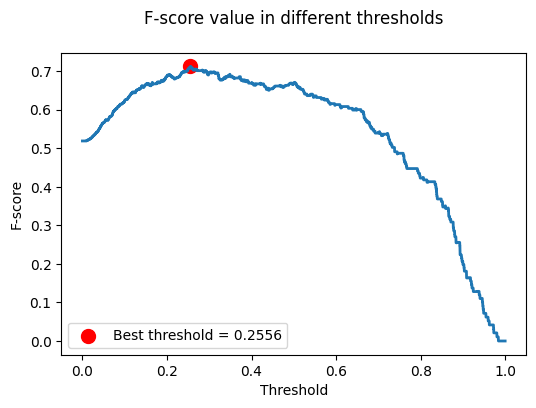

In [34]:
plt.figure(figsize=(6,4), dpi=100)
plt.plot(thresholds, f1score, 'tab:blue', lw=2)
plt.scatter(thresholds[idx], f1score[idx], marker='o', s=100, color='red', label='Best threshold = %0.4f' % best_thresh_1)
plt.title("F-score value in different thresholds\n")
plt.xlabel('Threshold')
plt.ylabel('F-score')
plt.legend(loc=3)
plt.show()

In [35]:
perfomance_review = pd.concat([classification_metrics(y_train, train_pred).T, 
                                                 classification_metrics(y_train, train_pred_1).T, 
                                                 classification_metrics(y_train, train_pred_2).T], axis=1)

perfomance_review.columns = ['Threshold= 0.5', "Threshold= 0.2566", "Threshold= 0.2556"]
perfomance_review

,Threshold= 0.5,Threshold= 0.2566,Threshold= 0.2556
Accuracy,0.7896,0.7523,0.7542
Recall,0.6064,0.8617,0.8670
Precision,0.7451,0.6022,0.6037
F-score,0.6686,0.7090,0.7118


According to the above table, changing the threshold value helps in improvng the model performance by increasing the F-score and recall value.